---
## Question 1
---

9Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [ ]:
import numpy as np

In [ ]:
# define procedure here
def check_input(L):
  for j in range(len(L)):
     L1 = L[j].copy();
     L1.sort();
     for i in range(len(L[j])):
       if L1[i] != i+1:
           return False

  L4 = np.array(L)
  L4_t = L4.transpose()
  for j in range(len(L)):
     L4_t = L[j].copy();
     L4_t.sort();
     for i in range(len(L[j])):
       if L4_t[i] != i+1:
           return False   
           
  return True

In [ ]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [96]:
import pandas as pd
data = pd.read_csv("/StudentMarkSheet.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB
None


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [65]:
print("Total rows : ", len(data.index))
nullData = data[data.isnull().any(axis=1)]
print("Number of null rows : ", len(nullData.index))


data = data.dropna()
print("Total rows : ", len(data.index))

Total rows :  200
Number of null rows :  4
Total rows :  196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [ ]:
data1 = data.loc[data['Student name'] == "James Walker"]
data2 = data1[['Exam name','Marks']]
print(data2)

       Exam name  Marks
0        Biology   31.0
42     Chemistry   61.0
71   Mathematics   23.0
150      Physics  100.0
180    Sociology   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [54]:
bio = data.loc[data['Exam name'] == "Biology"]
bio_marks = bio['Marks']
numberOfbio = len(bio.index)
sumBioMarks =  bio_marks.sum()
Average_Bio = sumBioMarks/numberOfbio
print("Average marks for Biology are : " , Average_Bio) 


chem = data.loc[data['Exam name'] == "Chemistry"]
chem_marks = chem['Marks']
numberOfchem = len(chem.index)
sumChemMarks =  chem_marks.sum()
Average_Chem = sumChemMarks/numberOfchem
print("Average marks for Chemistry are : " , Average_Chem) 


math = data.loc[data['Exam name'] == "Mathematics"]
math_marks = math['Marks']
numberOfmath = len(math.index)
sumMathMarks =  math_marks.sum()
Average_Math = sumMathMarks/numberOfmath
print("Average marks for Mathematics are : " , Average_Math) 


phi = data.loc[data['Exam name'] == "Philosophy"]
phi_marks = phi['Marks']
numberOfphi = len(phi.index)
sumPhiMarks =  phi_marks.sum()
Average_Phi = sumPhiMarks/numberOfphi
print("Average marks for Philosophy are : " , Average_Phi) 


phy = data.loc[data['Exam name'] == "Physics"]
phy_marks = phy['Marks']
numberOfphy = len(phy.index)
sumPhyMarks =  phy_marks.sum()
Average_Phy = sumPhyMarks/numberOfphy
print("Average marks for Physics are : " , Average_Phy) 



soc = data.loc[data['Exam name'] == "Sociology"]
soc_marks = soc['Marks']
numberOfsoc = len(soc.index)
sumSocMarks =  soc_marks.sum()
Average_Soc = sumSocMarks/numberOfsoc
print("Average marks for Sociology are : " , Average_Soc) 






Average marks for Biology are :  47.89473684210526
Average marks for Chemistry are :  50.57692307692308
Average marks for Mathematics are :  48.97222222222222
Average marks for Philosophy are :  47.270270270270274
Average marks for Physics are :  51.76190476190476
Average marks for Sociology are :  56.026315789473685


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

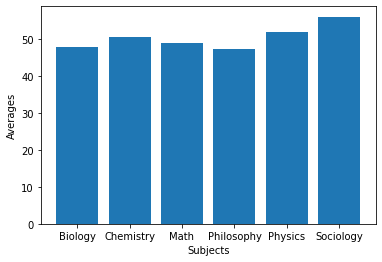

In [94]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Biology" , "Chemistry" , "Math" , "Philosophy" , "Physics" , "Sociology"])
y = np.array([Average_Bio , Average_Chem , Average_Math , Average_Phi , Average_Phy , Average_Soc])
plt.xlabel("Subjects")
plt.ylabel("Averages")


plt.bar(x,y)
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv("/CatData.csv")
data = data.dropna()

**Part B** - Identify the independant and dependant variables (comment answer below)

In [79]:
# dependant variable: Mass
# independant variable: Tail Length 

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [80]:
num = int(len(data)*80)
train = data[:num]
test = data[num:]


regr =  linear_model.LinearRegression()

train_x =  np.array(train[["Tail Length (cm)"]])
train_y =  np.array(train[["Mass (kg)"]])
regr.fit(train_x , train_y)


LinearRegression()

**Part D** - Print the values for slope and y-intercept

In [81]:
slope = regr.coef_
intercept = regr.intercept_
print("Slope is : " , slope)
print("Intercept is : " , intercept)

Slope is :  [[0.49685566]]
Intercept is :  [-5.78083136]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

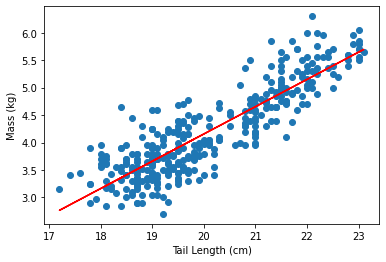

In [83]:
plt.scatter(train["Tail Length (cm)"] , train["Mass (kg)"])
plt.plot(train["Tail Length (cm)"] , slope[0] * train_x + intercept , color = "red")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
plt.show()
